In [169]:
from __future__ import division # For python 2.*
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import tree,model_selection,metrics
import mltools as ml
np.random.seed(0)
%matplotlib inline

# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)

# The test data (200,000 data points)
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

#Current taking only 10k of the 200k data to allow faster testing
Xtr, Xva, Ytr, Yva = ml.splitData(X[:20000], Y[:20000], 0.80)

print(X.shape)
print(Y.shape)

(200000L, 14L)
(200000L,)


# Statistics of Features

In [185]:
features = int(X.shape[1])
print "Number of Features:", features
for n in range(features):
    print "Feature {:>2}: min = {:>7}, max = {:>8}, mean = {:>13}, var = {}".format(n+1,
                                    min(X[:,n]), max(X[:,n]), np.mean(X[:,n]), np.var(X[:,n]))

Number of Features: 14
Feature  1: min =   193.5, max =    253.0, mean =   241.6011037, var = 83.4991711498
Feature  2: min =   152.5, max =    249.0, mean =   227.3765713, var = 92.625593125
Feature  3: min =  214.25, max =    252.5, mean =   241.5541505, var = 35.2863398033
Feature  4: min =   152.5, max =    252.5, mean =  232.82676815, var = 97.6257317486
Feature  5: min =    10.0, max =  31048.0, mean =   3089.923365, var = 15651513.7564
Feature  6: min =     0.0, max =  13630.0, mean =     928.25902, var = 3081761.81695
Feature  7: min =     0.0, max =   9238.0, mean =     138.09383, var = 443951.746446
Feature  8: min =     0.0, max =   125.17, mean =  3.2485793303, var = 8.21948502491
Feature  9: min = 0.87589, max =   19.167, mean = 6.49865290275, var = 6.40504819136
Feature 10: min =     0.0, max =    13.23, mean = 2.09713912048, var = 4.36344047061
Feature 11: min =     0.0, max =   66.761, mean = 4.21766040935, var = 4.08637188423
Feature 12: min =     0.0, max =   73.902, 

In [177]:
def frequencyOfFeature(feature, Y, bins):
    frequency = []
    for n,i in enumerate(feature):
        if Y[n] == 1:
            frequency.append(i)
    return frequency

Feature 1


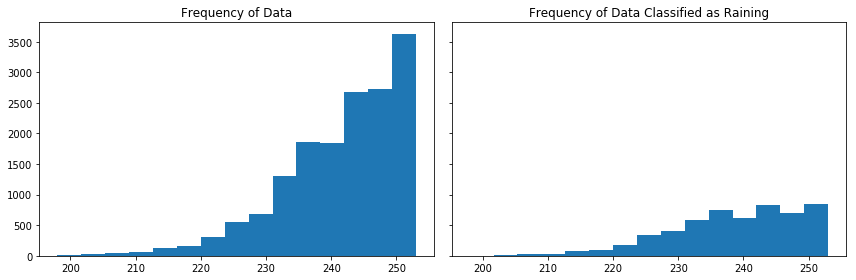

Feature 2


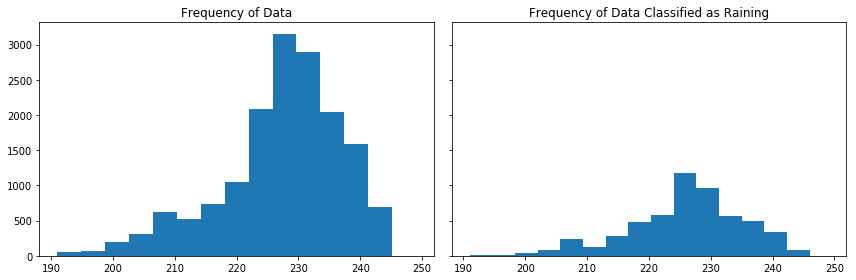

Feature 3


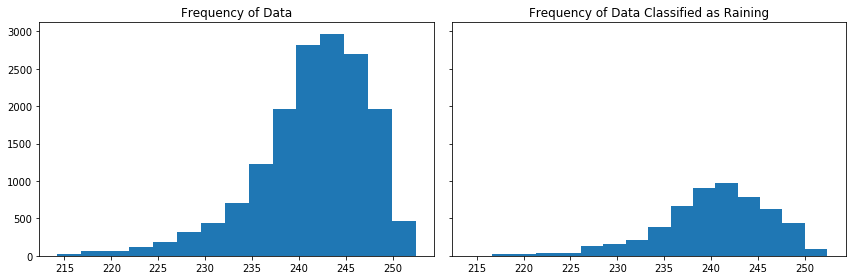

Feature 4


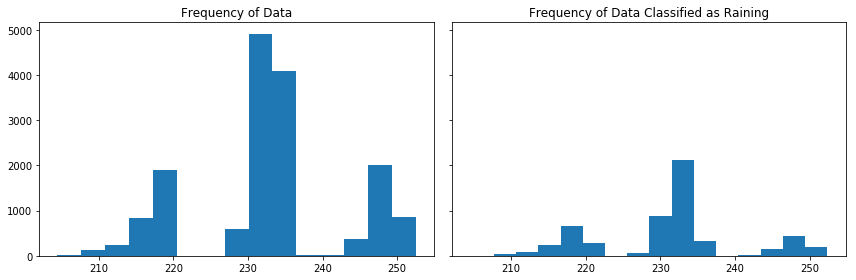

Feature 5


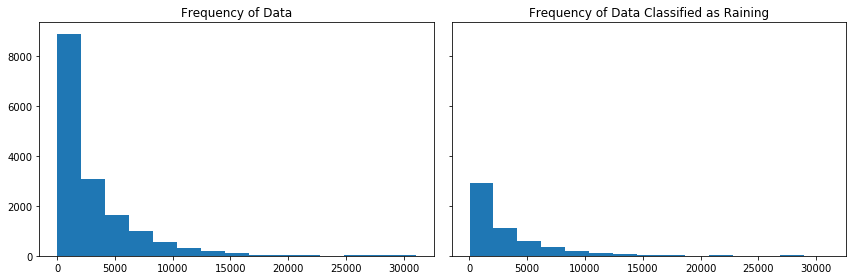

Feature 6


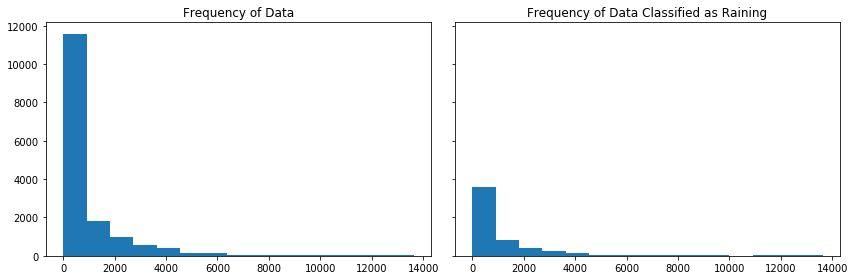

Feature 7


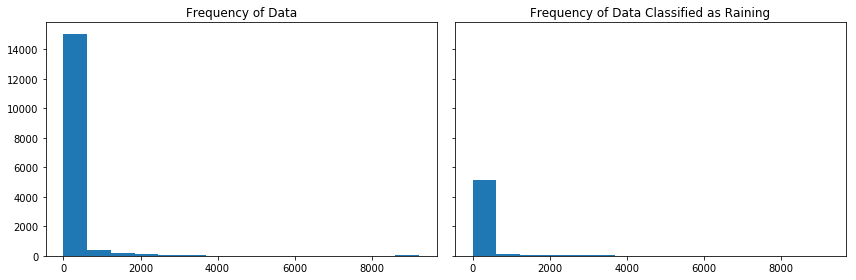

Feature 8


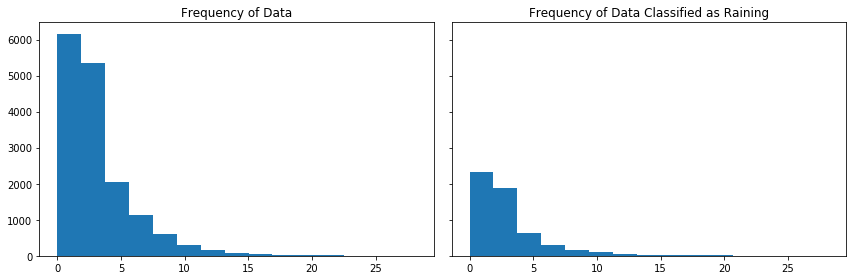

Feature 9


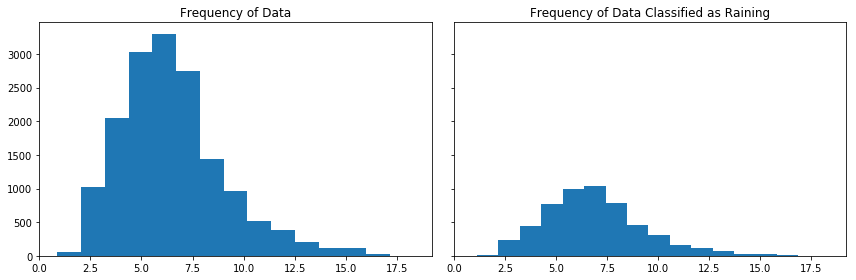

Feature 10


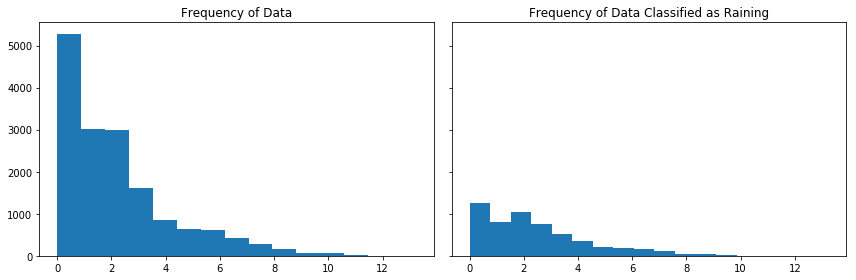

Feature 11


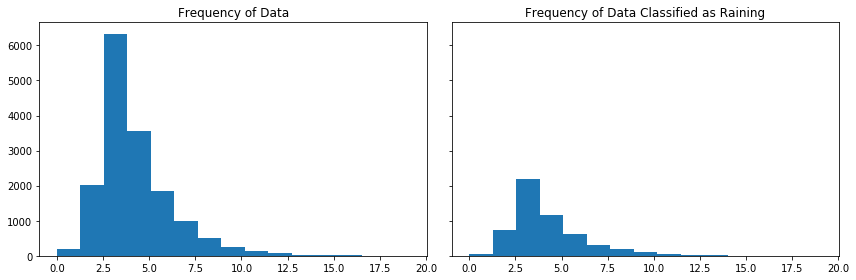

Feature 12


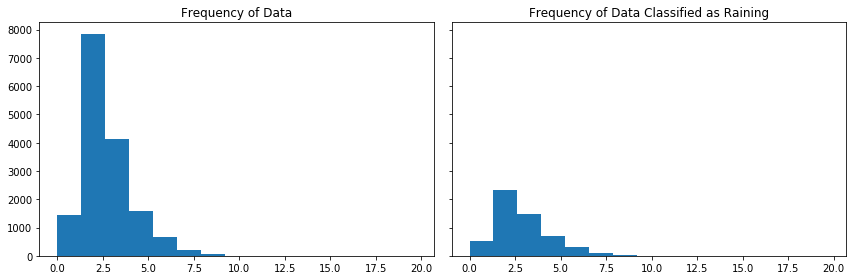

Feature 13


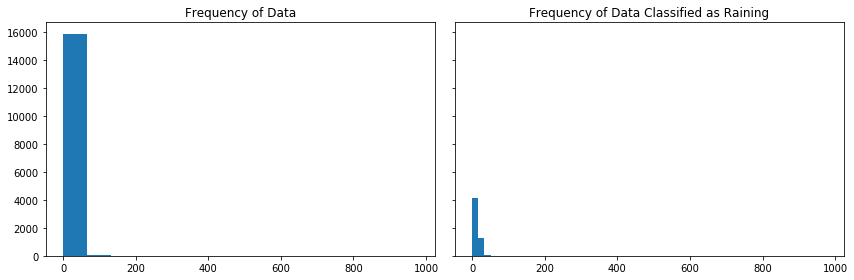

Feature 14


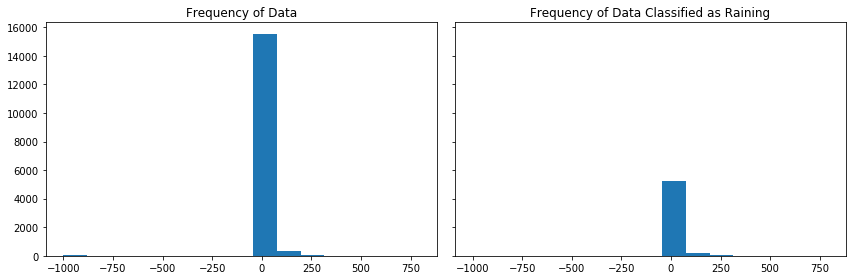

In [178]:
features = int(X.shape[1])
bins = 15
for n in range(features):
    print("Feature {}".format(n+1))
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4),sharey=True, sharex=True)
    ax1.hist(Xtr[:,n], bins=bins)
    ax1.set_title("Frequency of Data")
    ax2.hist(frequencyOfFeature(Xtr[:,n],Ytr.tolist(),bins), bins=bins)
    ax2.set_title("Frequency of Data Classified as Raining")    
    plt.tight_layout()
    plt.show()


# Decision Tree

In [173]:
learner = skl.tree.DecisionTreeClassifier(max_features=14, max_depth = 3)
learner.fit(Xtr,Ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=14, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

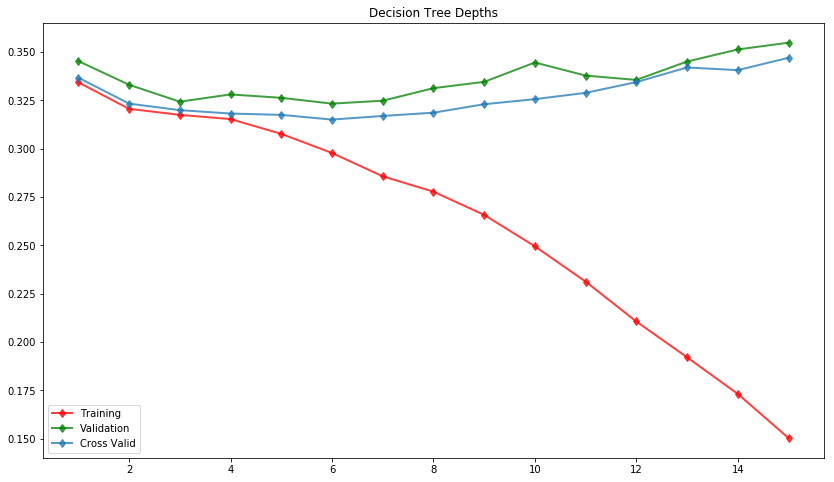

Lowest Train Error at Depth: 15, 0.150375
Lowest Valid Error at Depth: 6, 0.32325
Lowest Cross Valid Error at Depth: 6, 0.314999953607


In [174]:
MAX_DEPTHS = 16
N_FOLD = 5

depths = np.array([i for i in range(1,MAX_DEPTHS)])
training_error = np.zeros(len(depths))
validation_error = np.zeros(len(depths))
cross_valid_error = np.zeros(len(depths))

for n,i in enumerate(depths):
    learner = skl.tree.DecisionTreeClassifier(max_features=14, max_depth = i)
    learner.fit(Xtr,Ytr)
    training_error[n] = 1 - learner.score(Xtr, Ytr)
    validation_error[n] = 1- learner.score(Xva, Yva)
    cross_valid_error[n] = 1 - np.mean(skl.model_selection.cross_val_score(learner, Xtr, Ytr, cv=5))
    
f, ax = plt.subplots(1,1, figsize=(14, 8))
ax.plot(depths, training_error, lw=2, c='r', marker='d', alpha=0.75, label='Training')
ax.plot(depths, validation_error, lw=2, c='g', marker='d', alpha=0.75, label='Validation')
ax.plot(depths, cross_valid_error, lw=2, marker='d', alpha=0.75, label='Cross Valid')
ax.legend(loc=3)
plt.title("Decision Tree Depths")
plt.show()

minTrainError = min(training_error.tolist())
minValidError = min(validation_error.tolist())
minCrossValidError = min(cross_valid_error.tolist())
print("Lowest Train Error at Depth: {}, {}".format(training_error.tolist().index(minTrainError) + 1, minTrainError))
print("Lowest Valid Error at Depth: {}, {}".format(validation_error.tolist().index(minValidError) + 1, minValidError))
print("Lowest Cross Valid Error at Depth: {}, {}".format(cross_valid_error.tolist().index(minCrossValidError) + 1,
                                                         minCrossValidError))

[30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750, 780, 810, 840, 870, 900, 930, 960, 990, 1020, 1050, 1080, 1110, 1140, 1170]


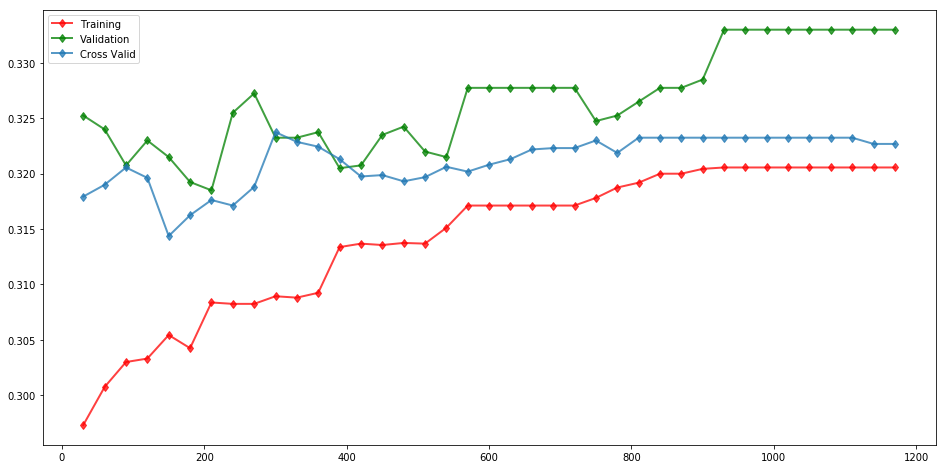

Lowest Train Error at Leaf: 30, 0.2973125
Lowest Valid Error at Leaf: 210, 0.3185
Lowest Cross Valid Error at Leaf: 150, 0.314375051367


In [192]:
DEPTH = 6
minLeaf= [30*n for n in range(1,40)]
minLeaf_train_error = np.zeros(len(minLeaf))
minLeaf_valid_error = np.zeros(len(minLeaf))
minLeaf_cross_valid_error = np.zeros(len(minLeaf))
print(minLeaf)

for n,i in enumerate(minLeaf):
    learner = skl.tree.DecisionTreeClassifier(max_features=14, max_depth = DEPTH, min_samples_leaf=i)
    learner.fit(Xtr,Ytr)
    minLeaf_train_error[n] = 1 - learner.score(Xtr, Ytr)
    minLeaf_valid_error[n] = 1 - learner.score(Xva, Yva)
    minLeaf_cross_valid_error[n] = 1 - np.mean(skl.model_selection.cross_val_score(learner, Xtr, Ytr, cv=5))
    
f, ax = plt.subplots(1,1, figsize=(16, 8))
ax.plot(minLeaf, minLeaf_train_error, lw=2, marker='d', c='r', alpha=0.75, label='Training')
ax.plot(minLeaf, minLeaf_valid_error, lw=2, marker = 'd', c='g', alpha=0.75, label='Validation')
ax.plot(minLeaf, minLeaf_cross_valid_error, lw=2, marker = 'd', alpha=0.75, label='Cross Valid')
ax.legend()
plt.title("Decision Tree Leafs at Depth {}".format(DEPTH))
plt.show()

minTrainError = min(minLeaf_train_error.tolist())
minValidError = min(minLeaf_valid_error.tolist())
minCrossValidError = min(minLeaf_cross_valid_error.tolist())

print("Lowest Train Error at Leaf: {}, {}".format(minLeaf[minLeaf_train_error.tolist().index(minTrainError)], minTrainError))
print("Lowest Valid Error at Leaf: {}, {}".format(minLeaf[minLeaf_valid_error.tolist().index(minValidError)],
                                                  minValidError))
print("Lowest Cross Valid Error at Leaf: {}, {}".format(
                                            minLeaf[minLeaf_cross_valid_error.tolist().index(minCrossValidError)],
                                            minCrossValidError))

[30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750, 780, 810, 840, 870, 900, 930, 960, 990, 1020, 1050, 1080, 1110, 1140, 1170]


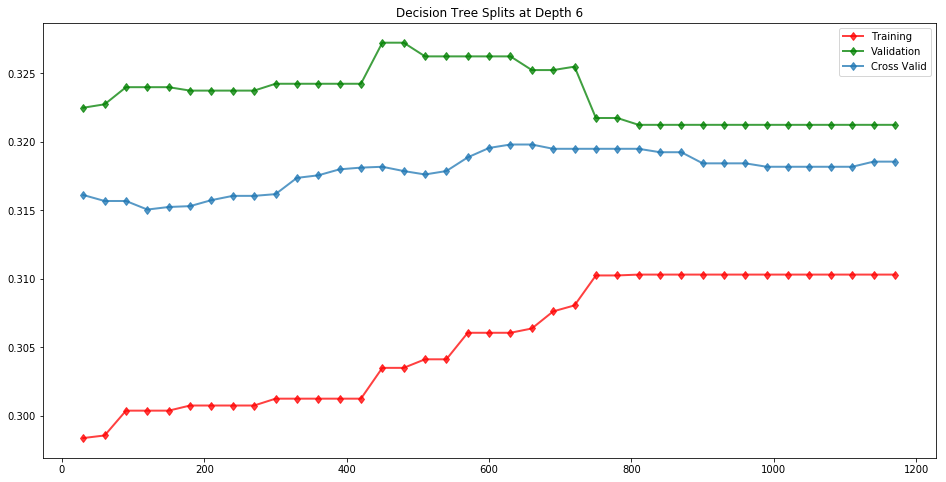

Lowest Train Error at Split: 30, 0.298375
Lowest Valid Error at Split: 810, 0.32125
Lowest Cross Valid Error at Split: 120, 0.315062336444


In [193]:
DEPTH = 6
minSplit= [30*n for n in range(1,40)]
minSplit_train_error = np.zeros(len(minSplit))
minSplit_valid_error = np.zeros(len(minSplit))
minSplit_cross_valid_error = np.zeros(len(minSplit))
print(minSplit)

for n,i in enumerate(minSplit):
    learner = skl.tree.DecisionTreeClassifier(max_features=14, max_depth = DEPTH, min_samples_split=i)
    learner.fit(Xtr,Ytr)
    minSplit_train_error[n] = 1 - learner.score(Xtr, Ytr)
    minSplit_valid_error[n] = 1 - learner.score(Xva, Yva)
    minSplit_cross_valid_error[n] = 1 - np.mean(skl.model_selection.cross_val_score(learner, Xtr, Ytr, cv=5))
    
f, ax = plt.subplots(1,1, figsize=(16, 8))
ax.plot(minSplit, minSplit_train_error, lw=2, marker='d', c='r', alpha=0.75, label='Training')
ax.plot(minSplit, minSplit_valid_error, lw=2, marker = 'd', c='g', alpha=0.75, label='Validation')
ax.plot(minSplit, minSplit_cross_valid_error, lw=2, marker = 'd', alpha=0.75, label='Cross Valid')
ax.legend()
plt.title("Decision Tree Splits at Depth {}".format(DEPTH))
plt.show()

minTrainError = min(minSplit_train_error.tolist())
minValidError = min(minSplit_valid_error.tolist())
minCrossValidError = min(minSplit_cross_valid_error.tolist())

print("Lowest Train Error at Split: {}, {}".format(minSplit[minSplit_train_error.tolist().index(minTrainError)], minTrainError))
print("Lowest Valid Error at Split: {}, {}".format(minSplit[minSplit_valid_error.tolist().index(minValidError)],
                                                  minValidError))
print("Lowest Cross Valid Error at Split: {}, {}".format(
                                            minSplit[minSplit_cross_valid_error.tolist().index(minCrossValidError)],
                                            minCrossValidError))

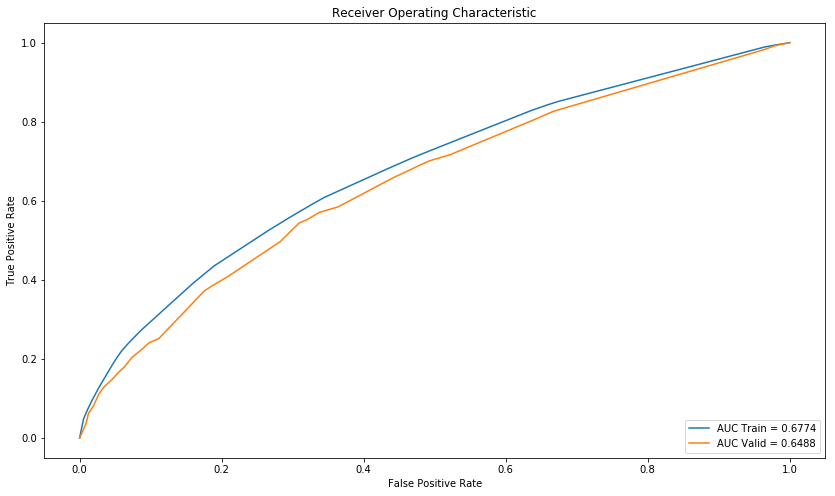

Difference in Area: 0.0285506281276


In [194]:
#Final Tree
DEPTH = 6 
LEAF = 150
SPLIT = 120

learner = skl.tree.DecisionTreeClassifier(max_features=14,max_depth = DEPTH,min_samples_leaf=LEAF,min_samples_split=SPLIT)
learner.fit(Xtr,Ytr)

predict = learner.predict_proba(Xtr)[:,1]
predictVA = learner.predict_proba(Xva)[:,1]

fpr, tpr, threshold = skl.metrics.roc_curve(Ytr, predict)
fprVA, tprVA, thresholdVA = skl.metrics.roc_curve(Yva, predictVA)

roc_auc = metrics.auc(fpr, tpr)
roc_aucVA = metrics.auc(fprVA, tprVA)

f, ax = plt.subplots(1,1, figsize=(14, 8))
ax.plot(fpr, tpr, label='AUC Train = {:.4f}'.format(roc_auc))
ax.plot(fprVA, tprVA, label='AUC Valid = {:.4f}'.format(roc_aucVA))
plt.legend(loc=4)
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Difference in Area: {}".format(roc_auc - roc_aucVA))